# OASIS INFOBYTE TASK 4


# JANUARY 23 BATCH


# SPAM DETECTION MODEL


# Built an email spam detector to recognize and classify emails into spam and non-spam.

#MODEL PREPARED BY UBIOMO ENAJITE JUDITH;
#EMAIL: judithubiomo@gmail.com;
#CONTACT INFO: 08066828305*    

In [1]:
#Importing the neccessary libraries to aid the project flow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import spacy
#nlp = spacy.load('en_core_web_sm --user', disable=['ner'])
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
#calling in the dataset to work with
email_df = pd.read_csv(r'C:\Users\admin\Downloads\spam.csv',encoding="ISO-8859-1")
email_df.head().style.background_gradient(cmap='jet')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


In [3]:
email_df.shape
#this helps us to know how large or small our dataset is.
#it also tells us the number of rows and columns

(5572, 5)

In [4]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
email_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

The above lines of code has helped us to really understand what kind of dataset we are working on and how large it is. 
It also gave us insight on the types of dataset and the memory usage.  

# DATA CLEANING AND PREPROCESSING

In [6]:
email_df.duplicated().sum()

403

#There are 403 duplicates in our df

In [7]:
email_df.drop_duplicates()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#duplicates have been dropped, hence, the reduction on the number of rows

In [8]:
email_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

to detect the presence of missing values, the above line of code was used.
#Missing values were detected on unnamed2, unnamed3 and unnamed4

In [9]:
#dropped the columns which had the null values as they had no significance going forward in the model 
email_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
email_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renamed columns v1 and v2 to marker and report 
email_df.rename(columns={'v1':'marker','v2':'report'},inplace=True)
email_df.head()

,marker,report
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#identifying and indicating our unique value
email_df['marker'].unique()

array(['ham', 'spam'], dtype=object)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='marker', ylabel='count'>

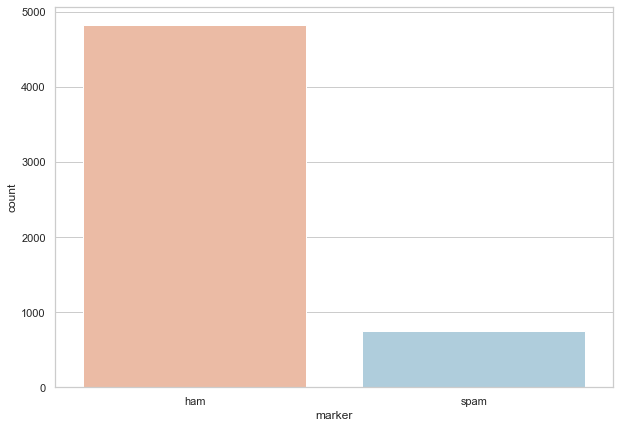

In [12]:
#value count analysis
#sns.countplot(x='marker',data=email_df)
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='marker',data=email_df,palette='RdBu')

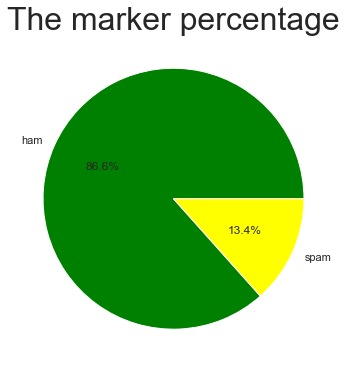

In [13]:
#visuaize the label percentage in the train dataset
label=email_df['marker'].value_counts()
#to visualize the above information in the pie chart
plt.figure(figsize=(14,6))
plt.pie(label,labels=['ham','spam'],colors=['green','yellow'],autopct='%1.1f%%')
#set the title name with fontsize 
plt.title("The marker percentage",fontsize=32)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

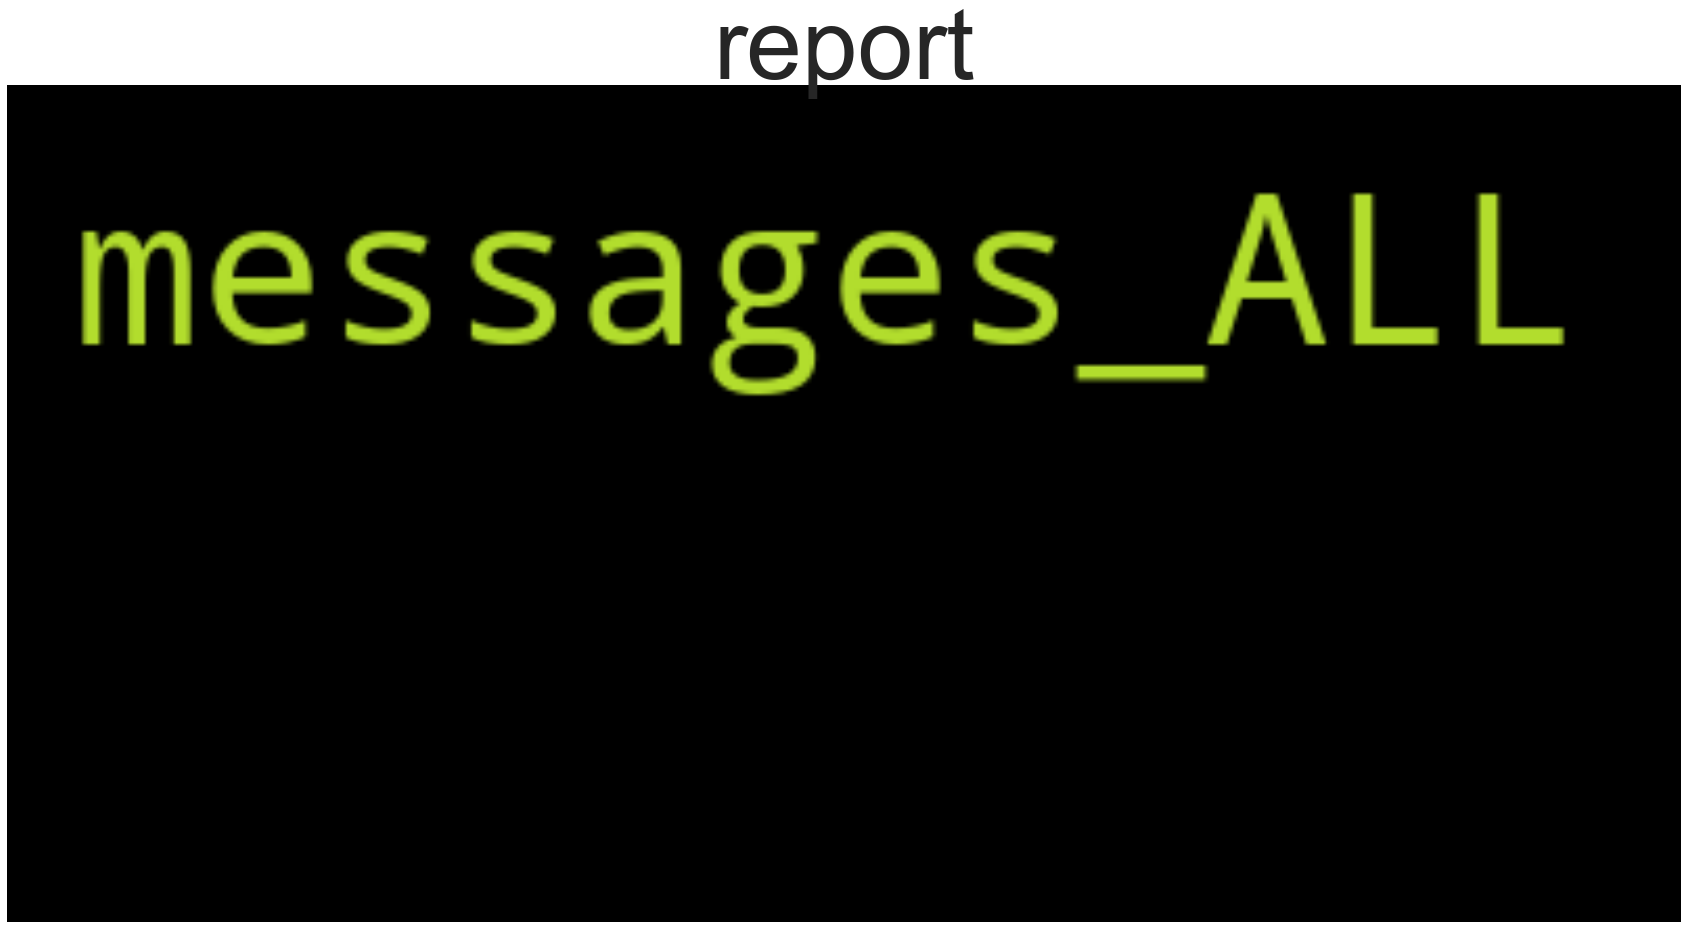

In [14]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
messages_All = " ".join(review for review in email_df['report'])
fig = plt.subplots(1, figsize=(30,30))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate("messages_ALL")
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title("report",fontsize=100)
plt.axis('off')

In [15]:
from nltk.stem.porter import PorterStemmer

In [16]:
import nltk
nltk.download('words')

[nltk_data] Error loading words: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [18]:
#importing stopwords
from nltk.corpus import stopwords

In [19]:
ps = PorterStemmer()

In [20]:
#Checking Sub-string
rev =re.sub('[^a-zA-Z]', ' ',email_df['report'][0])
rev

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

In [21]:
#change all letters to lower case
rev.lower()

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [22]:
#splitting every sub-string 
rev.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [23]:
# Seperating every sub-string which is not present in stopwords
rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]
rev

['g',
 ' ',
 'u',
 'n',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'n',
 'g',
 ' ',
 'p',
 'n',
 ' ',
 ' ',
 'c',
 'r',
 'z',
 ' ',
 ' ',
 ' ',
 'a',
 'v',
 'l',
 'b',
 'l',
 'e',
 ' ',
 'n',
 'l',
 ' ',
 'n',
 ' ',
 'b',
 'u',
 'g',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 ' ',
 'w',
 'r',
 'l',
 ' ',
 'l',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'n',
 'e',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 ' ',
 'r',
 'e',
 ' ',
 'w',
 ' ',
 ' ',
 ' ']

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
corpus = []

In [27]:
#Now Create a function to clean the text and return the tokens. The cleaning of the text can be done by first
#removing punctuation and then removing the useless words also known as stop words.
def process(text):
 nopunc = [char for char in text if char not in string.punctuation]
 nopunc = ''.join(nopunc)
 clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
 return clean
# to show the tokenization
email_df['report'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: report, dtype: object

In [28]:
# Returning all sentences which are without Stopwords present in lower cases
corpus

[]

In [29]:
#declaring the data into X and y
X = email_df['report'].values
y = email_df['marker'].values

In [30]:
#Install the TfidfVectorizer for covert the categorical data to array
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [31]:
#checking X values
print(X.shape, X)

(5572, 8672)   (0, 8489)	0.22080132794235655
  (0, 8267)	0.18238655630689804
  (0, 8030)	0.22998520738984352
  (0, 7645)	0.15566431601878158
  (0, 5920)	0.2553151503985779
  (0, 5537)	0.15618023117358304
  (0, 4476)	0.2757654045621182
  (0, 4350)	0.3264252905795869
  (0, 4087)	0.10720385321563428
  (0, 3634)	0.1803175103691124
  (0, 3594)	0.15318864840197105
  (0, 3550)	0.1481298737377147
  (0, 2327)	0.25279391746019725
  (0, 2048)	0.2757654045621182
  (0, 1751)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 1303)	0.24415547176756056
  (0, 1069)	0.3264252905795869
  (1, 8392)	0.4316010362639011
  (1, 5533)	0.5465881710238072
  (1, 5504)	0.27211951321382544
  (1, 4512)	0.4082988561907181
  (1, 4318)	0.5236458071582338
  (2, 8447)	0.18669123587240305
  (2, 8405)	0.14511814920515034
  :	:
  (5570, 7049)	0.20534386872930602
  (5570, 7039)	0.18426763178390448
  (5570, 5334)	0.21003730857873565
  (5570, 4615)	0.15965529817341642
  (5570, 4218)	0.1224661019112692
  (5570, 4161)	0.282

In [32]:
#checking y
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [33]:
#Divided the data into train_test and use 30% used for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [34]:
#check the shape
print(X.shape, y.shape)

(5572, 8672) (5572,)


In [35]:
#Import the AdaBoostClassifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Install the model
adam=AdaBoostClassifier()
#Fit the training data to the model
adam.fit(X_train,y_train)

AdaBoostClassifier()

In [36]:
#AdaBoostClassifier prediction to the dataset
adam_pred=adam.predict(X_test)
adam_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [37]:
#Classification report
print(classification_report(y_test,adam_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1446
        spam       0.93      0.85      0.88       226

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [38]:
#check model accuracy
accuracy=accuracy_score(y_test, adam_pred)
print(accuracy)

0.9700956937799043


<AxesSubplot:>

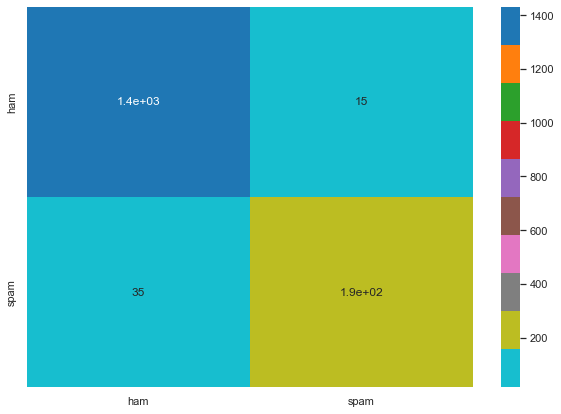

In [40]:
#confusion_matrix
cm=confusion_matrix(y_test,adam_pred)
sns.heatmap(cm,annot=True,cmap='tab10_r',xticklabels=['ham','spam'],yticklabels=['ham','spam'])

In [41]:
#Import the DecisionTreeClassifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
#install the library
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
#DecisionTreeClassifier Test data prediction
tree_pred=tree.predict(X_test)
tree_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [43]:
#Classification report
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1446
        spam       0.90      0.85      0.87       226

    accuracy                           0.97      1672
   macro avg       0.94      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [44]:
#check model accuracy
accuracy=accuracy_score(y_test, tree_pred)
print(accuracy)

0.9671052631578947


<AxesSubplot:>

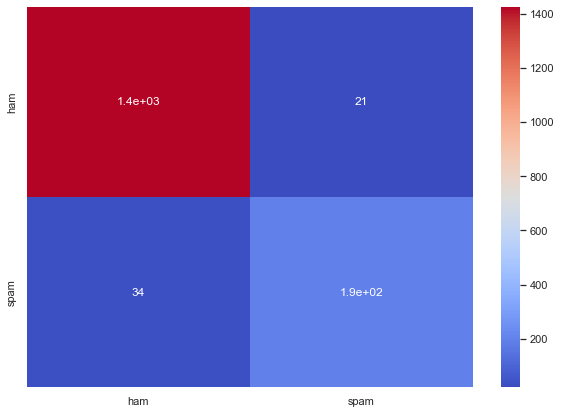

In [46]:
#confusion_matrix
cm=confusion_matrix(y_test,tree_pred)
sns.heatmap(cm,annot=True,cmap='coolwarm',xticklabels=['ham','spam'],yticklabels=['ham','spam'])